# Testing Report
### Key Metrics

In [76]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [77]:
log_file = 'logs/2022-09-06_11.55.24.csv'

header_info = pd.read_csv(log_file, nrows=0)
print('Reading test log with Settings:')
for col in header_info.columns:
  print(' ', col)

Reading test log with Settings:
  Duration: 10
  Cameras: 4
  Stitching Algorithm: OpenCV Stitcher


In [78]:
df = pd.read_csv(log_file, skiprows=[0])
df.head()

,Start Time,End Time,Status
0,0.433567,0.533102,0
1,0.533186,0.645597,1
2,0.645707,0.746416,1
3,0.746486,0.850647,0
4,0.850766,0.954028,1


### Successful Stitch Times

In [79]:
successful_stitches = df[df['Status'] == 0]
successful_stitches.head()

,Start Time,End Time,Status
0,0.433567,0.533102,0
3,0.746486,0.850647,0
6,1.068276,1.178556,0
7,1.178752,1.290260,0
10,1.506553,1.607654,0


In [80]:
stitch_times = successful_stitches['End Time'] - successful_stitches['Start Time']
print("Successful Stitch Time Statistics")
stitch_times.describe()

Successful Stitch Time Statistics


count    46.000000
mean      0.106890
std       0.004258
min       0.099534
25%       0.103596
50%       0.104366
75%       0.111606
max       0.112917
dtype: float64

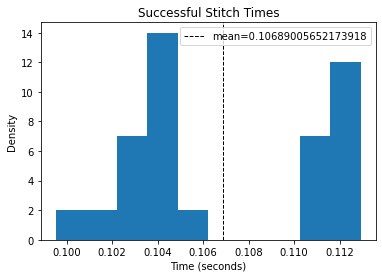

In [81]:
mean = np.mean(stitch_times)

plt.hist(stitch_times)
plt.axvline(mean, color='k', linestyle='dashed', linewidth=1,label=('mean='+str(mean)))
plt.title('Successful Stitch Times')
plt.ylabel('Density')
plt.xlabel('Time (seconds)')
plt.legend();

### Stitch Percentage

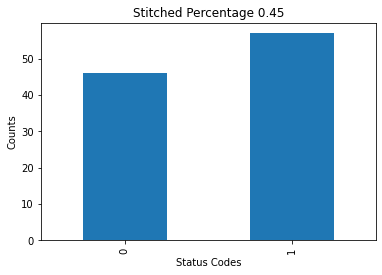

In [82]:
stitch_rate = round(successful_stitches.shape[0] / df.shape[0], 2)
stitch_rate

vc = df['Status'].value_counts().sort_index()
vc.plot(kind='bar')
plt.xlabel('Status Codes')
plt.ylabel('Counts')
plt.title(f'Stitched Percentage {stitch_rate}');